<a href="https://colab.research.google.com/github/kittikhun62/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดาหรือเสาอาทิตย์ เครื่องบินขาเข้าจำนวนมากกว่ากัน(วันจันทร์ 1....7)

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [115]:
import pandas as pd

In [116]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import os

In [118]:
flights = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/flights.csv')
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [119]:
airports = pd.read_csv('/content/drive/MyDrive/DWDM2021_DATA/Mini Exam/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [120]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [121]:
gen_exams('623020760-0')

รหัสนักศึกษา 623020760-0 ทำข้อ 0 และ 5


ข้อ 0 หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด

In [136]:
merged_table = airports.merge(flights,how='left',left_on='รหัสสนามบิน',right_on='รหัสสนามบินต้นทาง')
merged_table #(เชื่อมตารางโดยใช้ index ของ รหัสสนามบินเเละรหัสสนามบินต้นทาง)

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,10165,Adak Island,AK,Adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
...,...,...,...,...,...,...,...,...,...,...,...
2702508,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702509,11097,Cody,WY,Yellowstone Regional,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702510,11865,Gillette,WY,Gillette Campbell County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702511,12441,Jackson,WY,Jackson Hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ทำการลบ missing โดยใช้ Dropna

In [123]:
merged_table.isnull().any()

รหัสสนามบิน           False
เมือง                 False
รัฐ                   False
ชื่อสนามบิน           False
วันในเดือน             True
วันในสัปดาห์           True
สายการบิน              True
รหัสสนามบินต้นทาง      True
รหัสสนามบินปลายทาง     True
ความล่าช้าขาออก        True
ความล่าช้าขาเข้า       True
dtype: bool

In [124]:
from matplotlib import pyplot as plt


{'boxes': [<matplotlib.lines.Line2D at 0x7fe26cb17b50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe26cb1f810>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe26cb26810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe26cb262d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe26cff2990>,
  <matplotlib.lines.Line2D at 0x7fe26cb1f290>]}

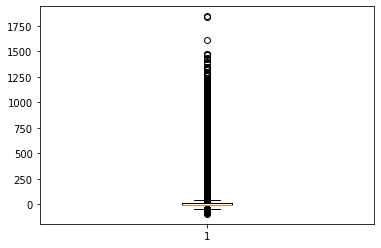

In [125]:
plt.boxplot(merged_table['ความล่าช้าขาเข้า'].dropna())

In [126]:
merged_table_dropna = merged_table.dropna()
merged_table_dropna

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
1,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,10299.0,14869.0,27.0,2.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-10.0,-38.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,10299.0,13487.0,-3.0,-27.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,10299.0,14869.0,-6.0,-23.0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,10299.0,13487.0,-4.0,-31.0
...,...,...,...,...,...,...,...,...,...,...,...
2702496,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,13487.0,-7.0,-23.0
2702497,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,11433.0,23.0,26.0
2702498,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,3.0,7.0
2702499,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13342.0,10397.0,-5.0,-7.0


In [127]:
merged_table_dropna.shape #จะเห็นได้ว่าหลังจากdropna มีข้อมูลของเเถวหายไปเป็นเเถวที่มีช่องว่าง Nan

(2702218, 11)

 ขาเข้ามากสุด เเละ ขาเข้าน้อยสุด


In [135]:
total = merged_table_dropna.groupby('รัฐ')['ความล่าช้าขาเข้า']
total = pd.DataFrame(total_Max)
total.reset_index()  #นำตารางที่เป็น dropna มาเลือกเเค่คอลัมที่เราต้องการ

,รัฐ,ความล่าช้าขาเข้า
0,AK,612.0
1,AZ,1835.0
2,CA,1385.0
3,CO,1143.0
4,CT,1227.0
5,DC,1137.0
6,FL,1466.0
7,GA,1429.0
8,HI,1228.0
9,IL,1081.0


In [130]:
max(total['ความล่าช้าขาเข้า']) #s

1845.0

In [131]:
total.describe()

,ความล่าช้าขาเข้า
count,36.000000
mean,1225.583333
std,274.329664
min,612.000000
25%,1105.750000
50%,1203.000000
75%,1421.500000
max,1845.000000


In [132]:
total_Max[total['ความล่าช้าขาเข้า'] == 1845]  # ดั้งนั้นรัฐที่มีจำนวนเที่ยวบินขาเข้ามากที่สุดคือ รัฐ Navada (NV)

,ความล่าช้าขาเข้า
รัฐ,
NV,1845.0


In [133]:
min(total['ความล่าช้าขาเข้า'])


612.0

In [134]:
total_Max[total['ความล่าช้าขาเข้า'] == 612.0] #ดั้งนั้นรัฐที่มีจำนวนเที่ยวบินขาเข้าน้อยที่สุดคือ รัฐ Alaska (Ak)

,ความล่าช้าขาเข้า
รัฐ,
AK,612.0


 italicised text ตอบข้อ 0 รัฐที่มีจำนวนเครื่องบินขาเข้ามากสุดคือ รัฐ Navada มีเครื่องบินขาเข้าอยู่ที่ 1845 รำ เเละรัฐที่มีจำนวนเครื่องบินขาเข้าน้อยที่สุด คือรัฐ Alaska มีจำนวน 612 รำ